[3.12559263 0.15401818]
0.20307668716659005
11387036868.698635


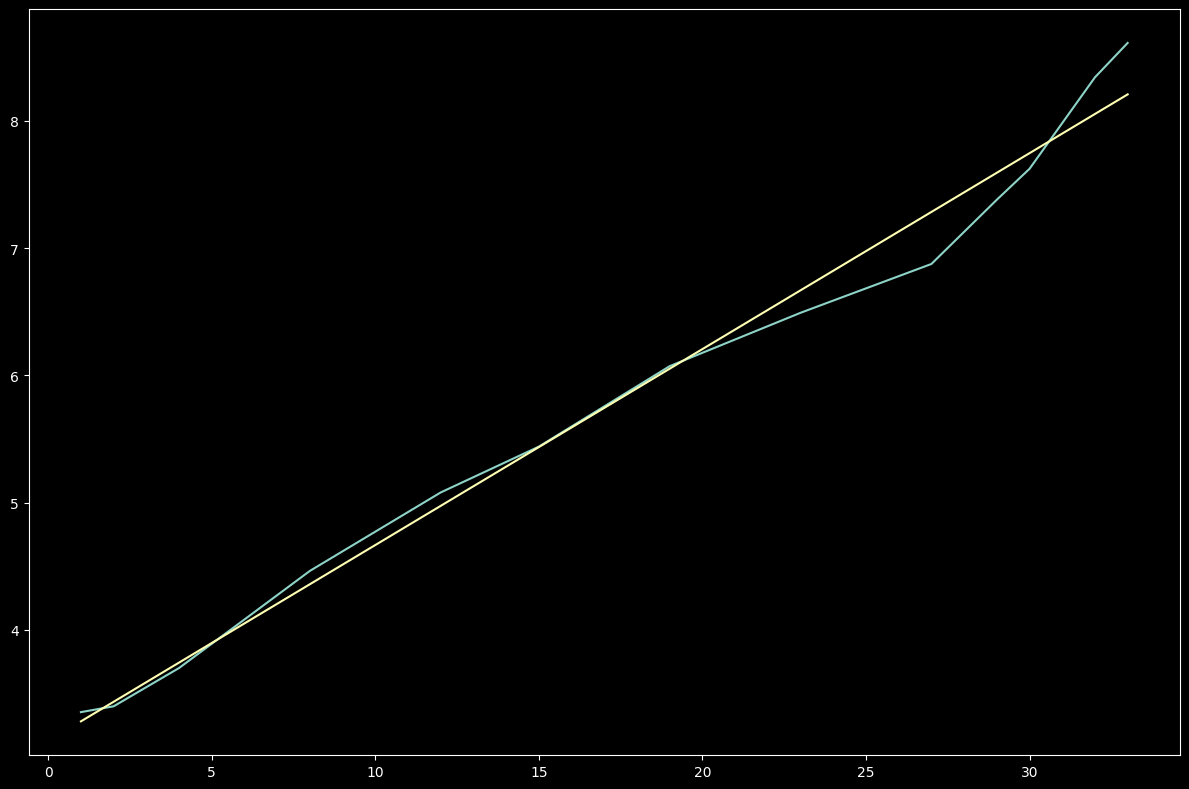

In [39]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989,
                  1993, 1997, 1999, 2000, 2002, 2003])
x = years - 1970

transistors = np.array([2250, 2500, 5000, 29000, 120000, 275000,
                        1180000, 3100000, 7500000, 24000000,
                        42000000, 220000000, 410000000])

b = np.log10(transistors)

A = np.column_stack([np.ones(len(x)), x])

theta = np.linalg.lstsq(A, b)

print(theta[0])
print(1/np.sqrt(13) * np.linalg.norm(A@theta[0] - b))
print(10**(theta[0][0] + theta[0][1]*(2015-1970)))
# print(np.dot(A, theta[0]))
plt.figure(figsize=(12, 8))
plt.plot(x, b)
plt.plot(x, np.dot(A, theta[0]))
plt.tight_layout()
plt.show()
plt.close()

### 14.6 a)

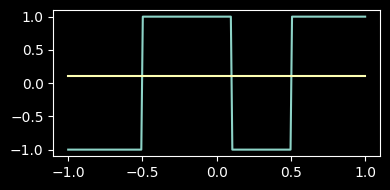

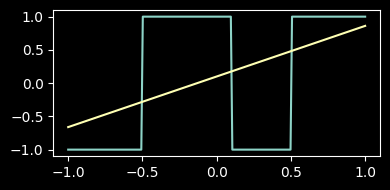

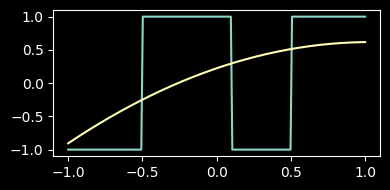

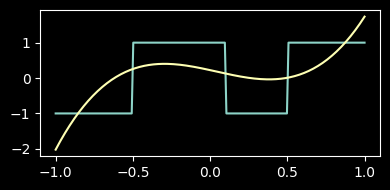

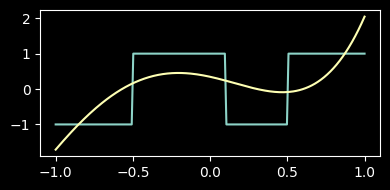

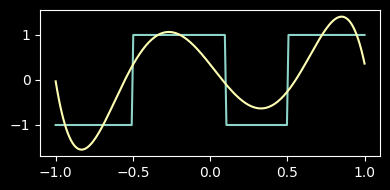

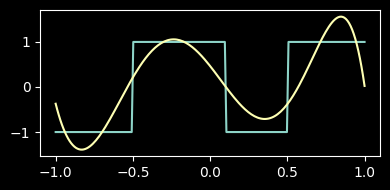

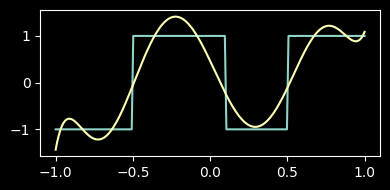

[np.float64(0.07035623639735145), np.float64(0.06304443365607607), np.float64(0.06255666796737223), np.float64(0.05446597816457652), np.float64(0.05391991492395134), np.float64(0.03761731479801347), np.float64(0.03687773862644374), np.float64(0.029354825621279477)]


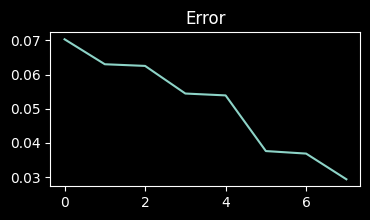

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 200
x = np.linspace(-1, 1, N)
y = np.zeros(N)

y[:] = -1
y[(x >= -0.5) & (x < 0.1) | (x >= 0.5)] = 1

col_stack = []
errors = []
for degree in range(0, 8):
    col_stack.append(x**degree)
    A = np.column_stack(col_stack)
    theta = np.linalg.lstsq(A, y)

    errors.append(np.linalg.norm(y-A@theta[0])/N)

    plt.figure(figsize=(4, 2))
    plt.plot(x, y)
    plt.plot(x, np.dot(A, theta[0]))
    plt.tight_layout()
    plt.show()

print(errors)
plt.figure(figsize=(4, 2))
plt.title("Error")
plt.plot(errors)
plt.show()
plt.close()

### 14.6 c)

결과값 똑같음

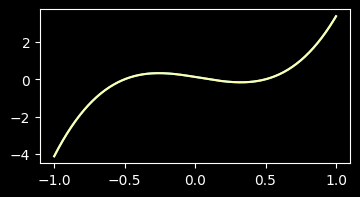

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 200
x = np.linspace(-1, 1, N)
y = 5*(x + 0.5)*(x - 0.1)*(x - 0.5)

A = np.column_stack([np.ones(len(x)), x, x**2, x**3])
theta = np.linalg.lstsq(A, y)

plt.figure(figsize=(4, 2))
plt.plot(x, y)
plt.plot(x, A@theta[0])
plt.show()
plt.close()

### 14.7

[-0.02163123  0.11696937 -0.04989651 -0.14349124  2.3387621   0.17746582]
Accuracy 0.975


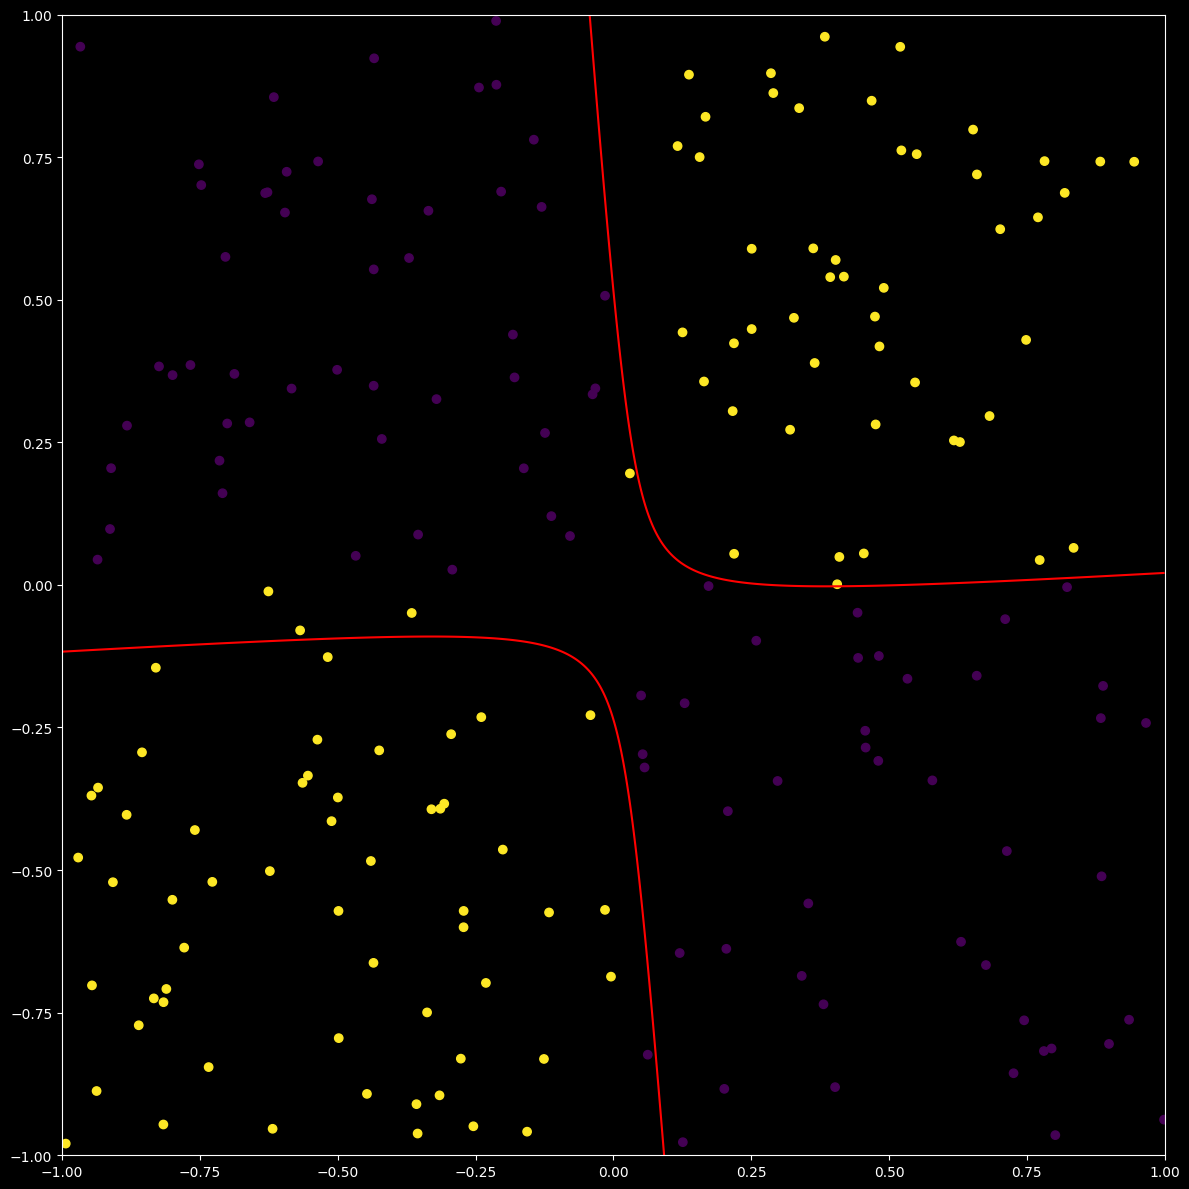

In [130]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(41)
N = 200
x = np.random.uniform(low=-1, high=1, size=(2, N))
cond = (x[0, :] * x[1, :] > 0)
y = np.where(cond, 1.0, -1.0)

x_1 = x[0,:]
x_2 = x[1,:]
A = np.column_stack([np.ones(N), x_1, x_2, x_1**2, x_1*x_2, x_2**2])
theta = np.linalg.lstsq(A, y, rcond=None)[0]

print(theta)
X1, X2 = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-1, 1, 500))
Z = np.column_stack([
    np.ones(X1.ravel().size),
    X1.ravel(),
    X2.ravel(),
    X1.ravel()**2,
    X1.ravel() * X2.ravel(),
    X2.ravel()**2
]) @ theta
Z = Z.reshape(X1.shape)

y_tilde = np.dot(A, theta)
y_pred = np.sign(y_tilde)
print(f"Accuracy {np.mean(np.sign(y_pred) == y)}")
# print(x)
# print(y)
plt.figure(figsize=(12, 12))
plt.scatter(x_1, x_2, c=y)
plt.contour(X1, X2, Z, levels=[0], colors='red')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, 1, 0, 3, 1],    # 제품 1이 필요로 하는 원료량
              [1, 2, 3, 1, 0],    # 제품 2
              [0, 1, 2, 2, 4]])   # 제품 3

b = np.array([100, 150, 200])

theta = np.linalg.lstsq(A, b, rcond=None)[0]
print(theta)
print(A@theta)

[ 5.52380952 18.0952381  30.66666667 16.28571429 22.        ]
[100. 150. 200.]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
T = 100
ts = np.linspace(0, T, N+1)
delt = T/N
gamma = 0.05

A = np.zeros((4,4))
B = np.zeros((4,2))
C = np.zeros((2,4))

A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt

In [15]:
x_0 = np.array([10, -20, 15, -5])
x_des = np.array([100, 50, 0, 0])

G = np.zeros((4,2*N))

for i in range(N):
    G[:, 2*i:2*(i+1)] = np.linalg.matrix_power(A, N-1-i) @ B

u_hat = np.linalg.lstsq(G, x_des - np.linalg.matrix_power(A, N)@x_0, rcond=None)[0]
print(u_hat)

[-0.16713038  0.13708798 -0.16711943 ... -0.1317018   0.15627203
 -0.13306164]


In [16]:
u_vec = u_hat

u_opt = u_vec.reshape(1000, 2).T

x = np.zeros((4,N+1))
x[:,0] = x_0

for t in range(N):
    x[:,t+1] = A.dot(x[:,t]) + B.dot(u_opt[:,t])

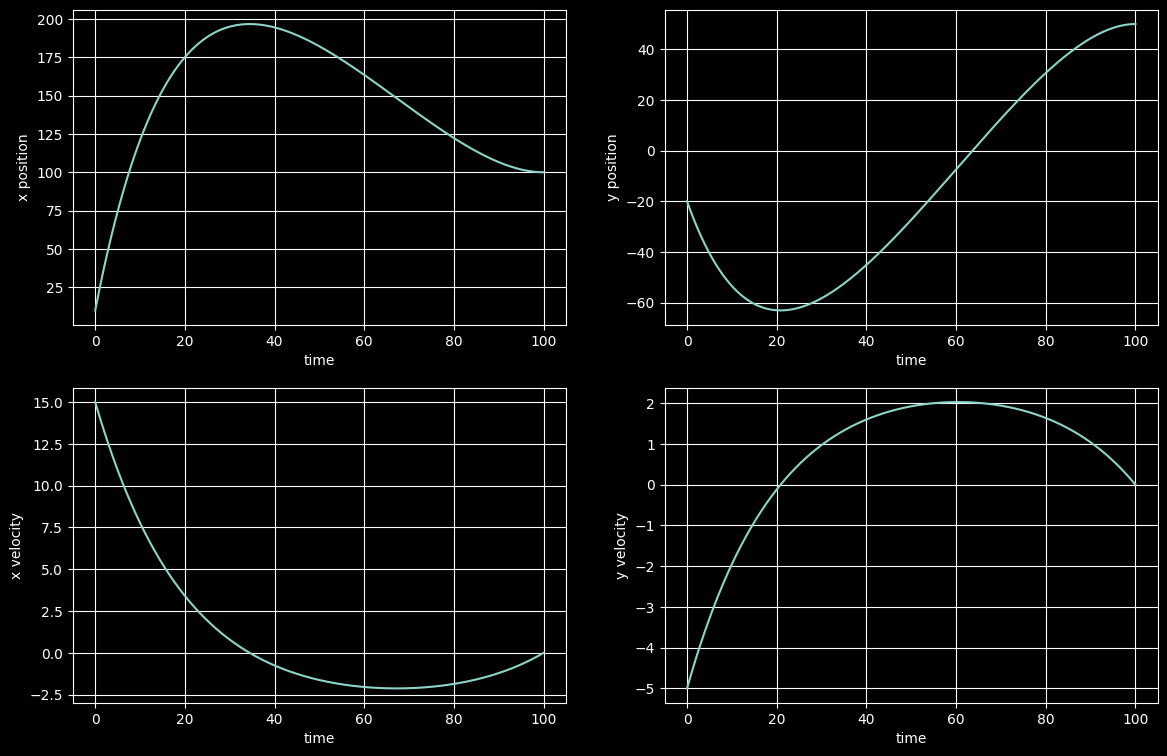

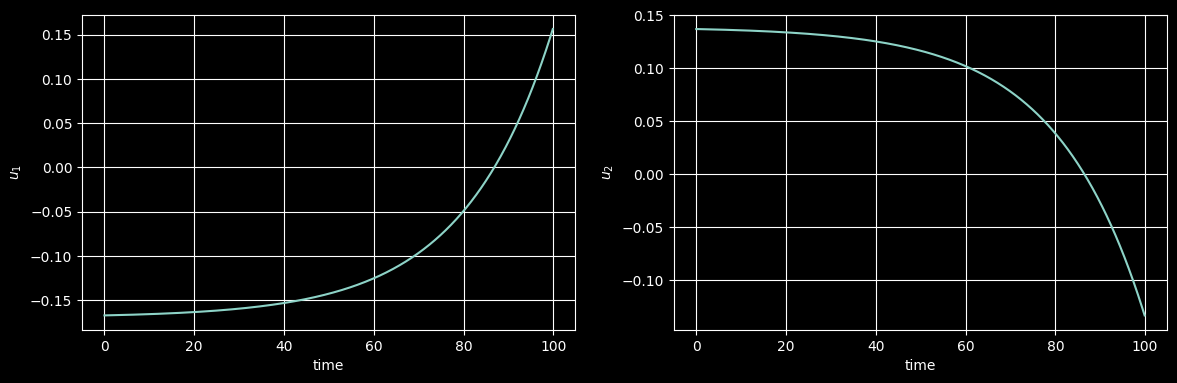

In [17]:
plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts,x[0,:])
plt.xlabel('time')
plt.ylabel('x position')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts,x[1,:])
plt.xlabel('time')
plt.ylabel('y position')
plt.grid()
plt.subplot(2,2,3)
plt.plot(ts,x[2,:])
plt.xlabel('time')
plt.ylabel('x velocity')
plt.grid()
plt.subplot(2,2,4)
plt.plot(ts,x[3,:])
plt.xlabel('time')
plt.ylabel('y velocity')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts[:-1],u_opt[0,:])
plt.xlabel('time')
plt.ylabel(r'$u_1$')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts[:-1],u_opt[1,:])
plt.xlabel('time')
plt.ylabel(r'$u_2$')
plt.grid()
plt.show()

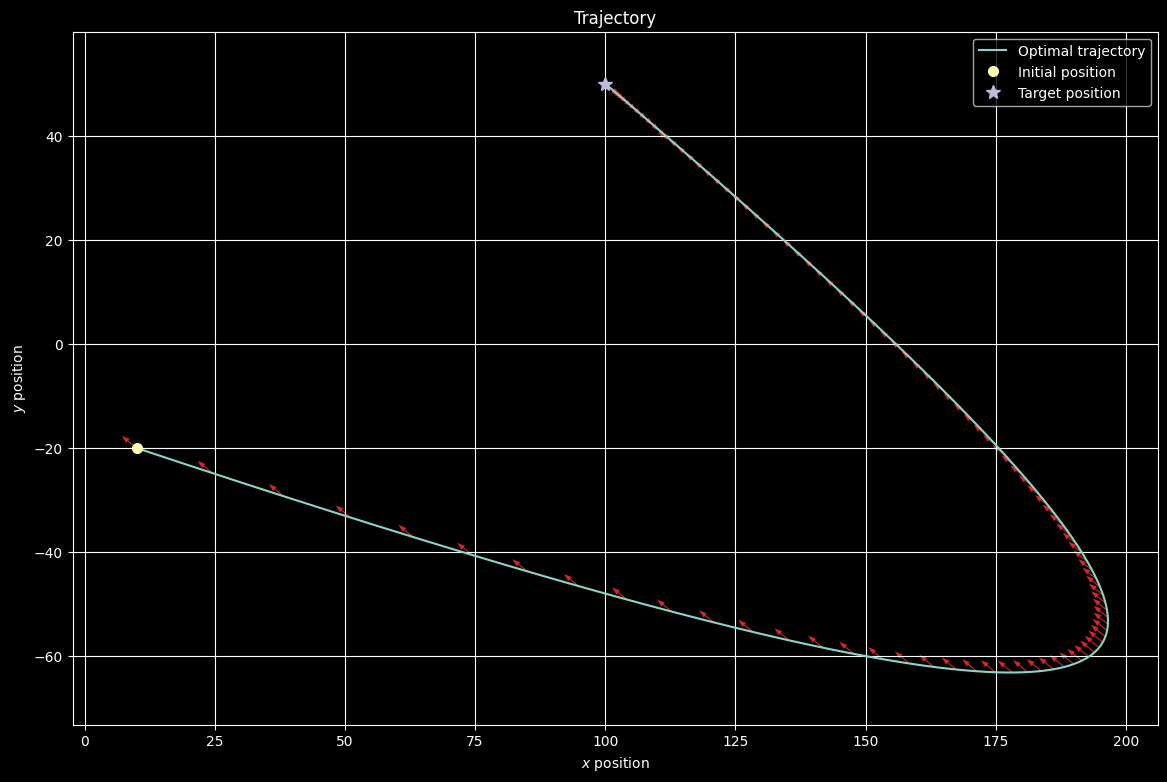

In [18]:
plt.figure(figsize=(14,9), dpi=100)
plt.plot(x[0,:],x[1,:], label='Optimal trajectory')
plt.plot(x_0[0], x_0[1], 'o', markersize=7, label='Initial position')
plt.plot(x_des[0], x_des[1], '*', markersize=10, label='Target position')
plt.title('Trajectory')
plt.legend()
for i in range(0,N-1,10):
    plt.arrow(x[0,i], x[1,i], 10*u_opt[0,i], 10*u_opt[1,i], head_width=1, width=0.2, fc='tab:red', ec='none')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()

In [14]:
import gymnasium as gym
import pygame  # 여전히 추가 추천 (pygame 초기화 위해)

pygame.init()  # 윈도우/맥에서 창 안 뜨는 문제 방지

# v3로 변경! (v2 대신)
env = gym.make("LunarLander-v3", render_mode="human")

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()  # 랜덤 액션
    observation, reward, terminated, truncated, info = env.step(action)

    # render는 human 모드에서 자동이지만, 안전하게 추가
    env.render()

    if terminated or truncated:
        print("Episode ended! Resetting...") # 디버깅용
        observation, info = env.reset()

env.close()

DependencyNotInstalled: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`